## <div align="center">FINAL PROJECT IF540 MACHINE LEARNING</div>
### <div align="center">Klasifikasi & Analisis Perilaku Pengunjung Mall Dengan Hierarchical Clustering & KNN Berdasarkan Karakteristik Kehidupan Untuk Perencanaan Marketing</div>

#### <div align="center">Semester Genap 2023/2024</div>

Link GitHub : https://github.com/KanekIAN/final_project_ML

In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Buka Data
customer = pd.read_csv('Customers.csv')
print("Columns of the DataFrame: \n{}".format(customer.columns))
customer

Columns of the DataFrame: 
Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [3]:
# Drop semua kolom kecuali 'Annual Income ($)' & 'Spending Score (1-100)'
df_selected = customer[['Annual Income ($)', 'Spending Score (1-100)']]
df_selected

,Annual Income ($),Spending Score (1-100)
0,15000,39
1,35000,81
2,86000,6
3,59000,77
4,38000,40
...,...,...
1995,184387,40
1996,73158,32
1997,90961,14
1998,182109,4


In [4]:
df_selected = customer[['Annual Income ($)', 'Spending Score (1-100)']]

#Min-Max normalization
def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

#Apply Min-Max normalization
normalized_df = df_selected.apply(min_max_normalize)

print("Normalized data:")
normalized_df

Normalized data:


,Annual Income ($),Spending Score (1-100)
0,0.078958,0.39
1,0.184236,0.81
2,0.452694,0.06
3,0.310569,0.77
4,0.200027,0.40
...,...,...
1995,0.970591,0.40
1996,0.385095,0.32
1997,0.478808,0.14
1998,0.958600,0.04


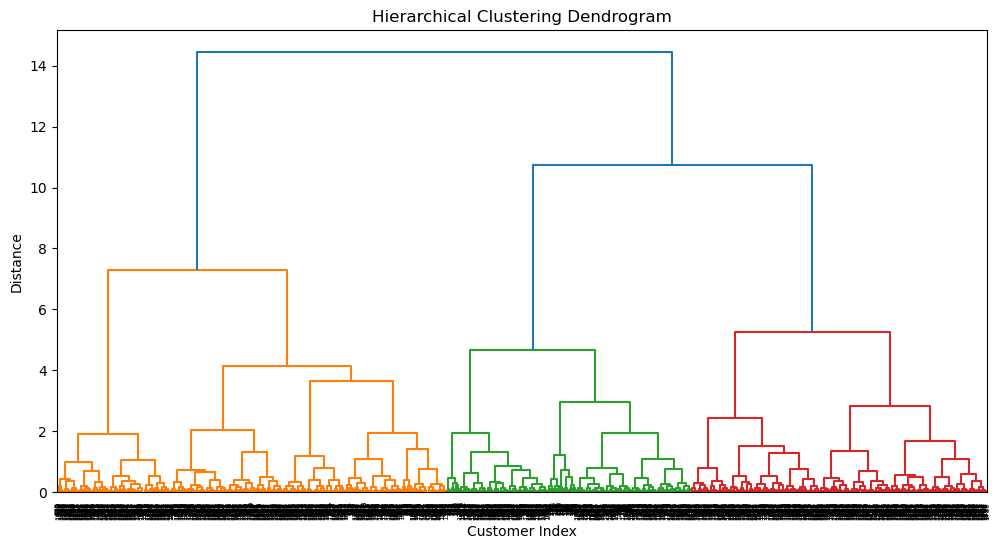

In [5]:
#Plot Dendrogram untuk cari number of clusters
from scipy.cluster.hierarchy import dendrogram, linkage

#Distance Metric & Linkage Method dengan euclidean & ward
Z = linkage(normalized_df, method='ward', metric='euclidean')

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

In [6]:
#Hierarchical Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

scaler = StandardScaler()
scaled_data = scaler.fit_transform(normalized_df)

# Pilih n_clusters
n_clusters = 11
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
cluster_labels = clusterer.fit_predict(scaled_data)

normalized_df['Cluster'] = cluster_labels
normalized_df

,Annual Income ($),Spending Score (1-100),Cluster
0,0.078958,0.39,2
1,0.184236,0.81,1
2,0.452694,0.06,0
3,0.310569,0.77,9
4,0.200027,0.40,2
...,...,...,...
1995,0.970591,0.40,6
1996,0.385095,0.32,3
1997,0.478808,0.14,0
1998,0.958600,0.04,6


In [7]:
#Training datanya
customer_train= AgglomerativeClustering(n_clusters=11, metric='euclidean', linkage='ward')  
y_pred= customer_train.fit_predict(normalized_df) 
customer_train

AgglomerativeClustering(metric='euclidean', n_clusters=11)

In [8]:
#Silhouette score biar bisa lihat gimana penyebaran dan pembagian kelompok Clusternya
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(normalized_df, y_pred)

print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.8465650884565473


In [9]:
def categorize_cluster(row):
    if row['Cluster'] == 0:
        return 'Low income & Low spending scores'
    elif row['Cluster'] == 1:
        return 'Moderate to high income & High spending scores'
    elif row['Cluster'] == 2:
        return 'High income & Moderate to high spending scores'
    elif row['Cluster'] == 3:
        return 'Moderate income & High spending scores'
    elif row['Cluster'] == 4:
        return 'Low to moderate income & Low to moderate spending scores'
    elif row['Cluster'] == 5:
        return 'Low to moderate income & Very low spending scores'
    elif row['Cluster'] == 6:
        return 'High income & Low spending scores'
    elif row['Cluster'] == 7:
        return 'Low income & High spending scores'
    elif row['Cluster'] == 8:
        return 'Moderate to high income & Moderate to high spending scores'
    elif row['Cluster'] == 9:
        return 'Moderate income & Moderate to high spending scores'
    elif row['Cluster'] == 10:
        return 'Low income & Low spending scores'
    else:
        return 'Unknown'

normalized_df['Customer Category'] = normalized_df.apply(categorize_cluster, axis=1)

normalized_df

,Annual Income ($),Spending Score (1-100),Cluster,Customer Category
0,0.078958,0.39,2,High income & Moderate to high spending scores
1,0.184236,0.81,1,Moderate to high income & High spending scores
2,0.452694,0.06,0,Low income & Low spending scores
3,0.310569,0.77,9,Moderate income & Moderate to high spending sc...
4,0.200027,0.40,2,High income & Moderate to high spending scores
...,...,...,...,...
1995,0.970591,0.40,6,High income & Low spending scores
1996,0.385095,0.32,3,Moderate income & High spending scores
1997,0.478808,0.14,0,Low income & Low spending scores
1998,0.958600,0.04,6,High income & Low spending scores


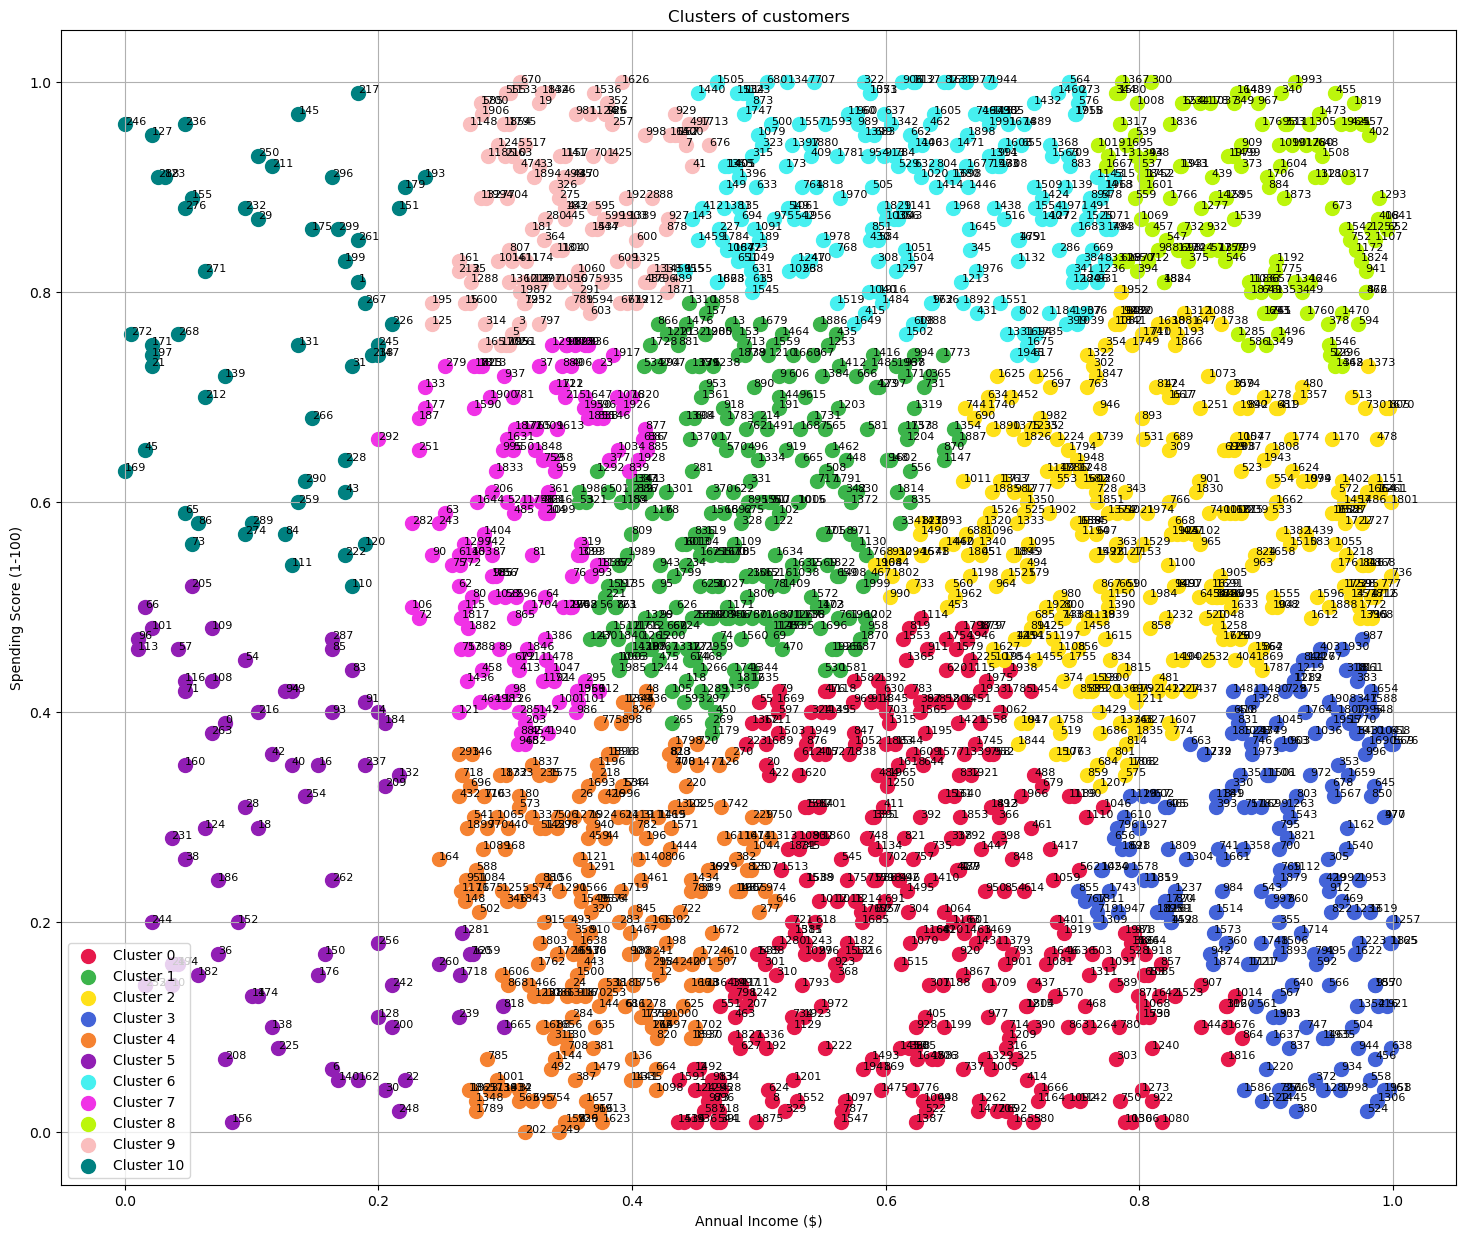

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define 11 warna cluster
color_list = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
              '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080']

plt.figure(figsize=(18, 15))

for cluster_label in set(y_pred):
    plt.scatter(normalized_df.loc[y_pred == cluster_label, 'Annual Income ($)'], 
                normalized_df.loc[y_pred == cluster_label, 'Spending Score (1-100)'],
                s=100, label=f'Cluster {cluster_label}', color=color_list[cluster_label])
    
    # Add labels
    for index, row in normalized_df.loc[y_pred == cluster_label].iterrows():
        plt.text(row['Annual Income ($)'], row['Spending Score (1-100)'], str(index), fontsize=8)

plt.title('Clusters of customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.9725
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        64
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        15
           3       1.00      0.89      0.94        46
           4       1.00      1.00      1.00        37
           5       0.98      0.95      0.97        61
           6       1.00      0.97      0.99        38
           7       1.00      0.96      0.98        54
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        25
          10       0.96      1.00      0.98        23

    accuracy                           0.97       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.97      0.97       400



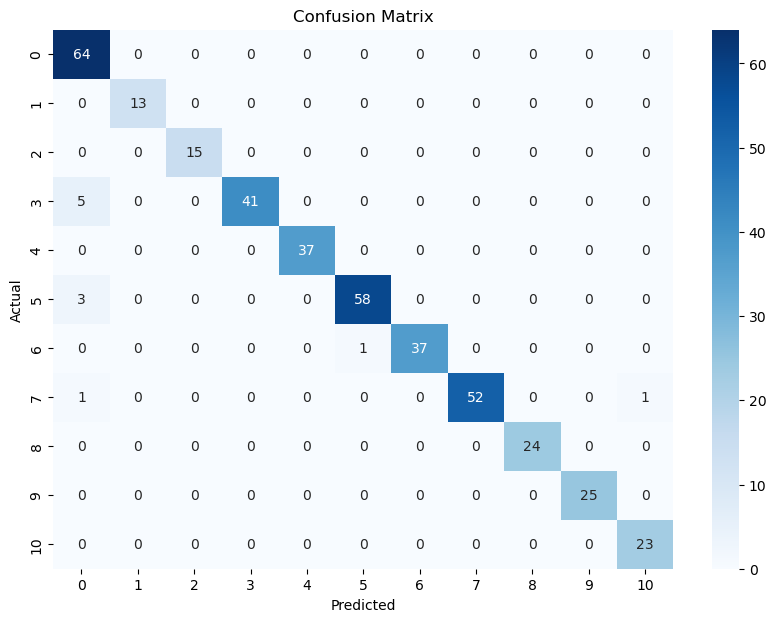

Cross-validation scores: [0.992 0.968 0.984 0.964 0.972 0.976 0.984 0.964]
Mean cross-validation score: 0.9755
Best parameters: {'metric': 'euclidean', 'n_neighbors': 1}
Best cross-validation score: 0.98875


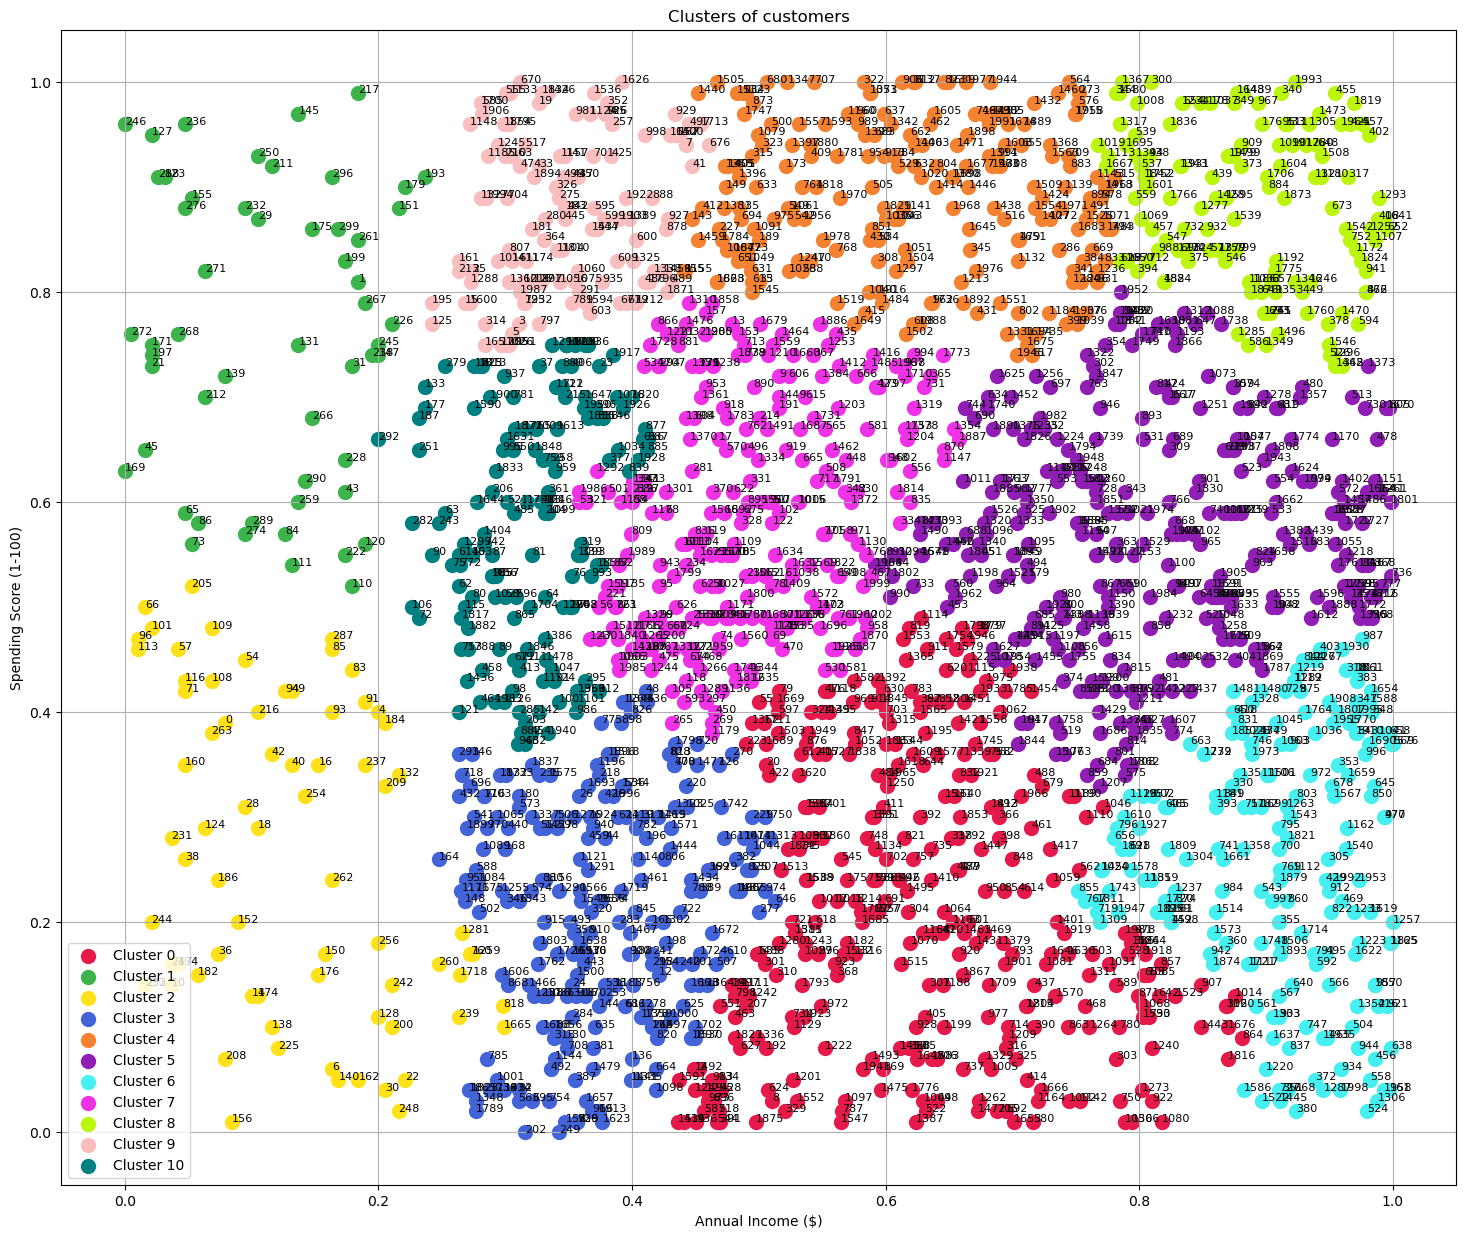

In [11]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 11 warna cluster
color_list = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
              '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080']

# Splitting data menjadi training & testing
X = normalized_df[['Annual Income ($)', 'Spending Score (1-100)']]
y = normalized_df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Classification
knn = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Performa model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(knn, X, y, cv=8, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Hyperparameter Tuning with Grid Search
param_grid = {'n_neighbors': np.arange(1, 10), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=8)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

# Visualisasi Setelah KNN
plt.figure(figsize=(18, 15))

for cluster_label in set(y):
    plt.scatter(normalized_df.loc[y == cluster_label, 'Annual Income ($)'], 
                normalized_df.loc[y == cluster_label, 'Spending Score (1-100)'],
                s=100, label=f'Cluster {cluster_label}', color=color_list[cluster_label])
    
    for index, row in normalized_df.loc[y == cluster_label].iterrows():
        plt.text(row['Annual Income ($)'], row['Spending Score (1-100)'], str(index), fontsize=8)

plt.title('Clusters of customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()